In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
url = ("C:\\Users\\USER\\jupyter_docs\\Africa Food Production (2004 - 2013).csv")
df = pd.read_csv(url)
print (df)

        Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]


In [3]:
new_df = pd.DataFrame(df.groupby(by =["Country", "Year", "Item"])['Value'].sum())
new_df

Value
Country  Year Item                        
Algeria  2004 Apples and products      165
              Bananas                    0
              Barley and products     1212
              Beans                      2
              Beer                     110
...                                    ...
Zimbabwe 2013 Tea (including mate)      19
              Tomatoes and products     24
              Vegetables, Other        203
              Wheat and products        25
              Wine                       2

[23110 rows x 1 columns]

In [4]:
new_df.groupby(['Country', 'Year'])["Value"].mean().sort_values(ascending = False)

Country   Year
Nigeria   2013    2944.770492
          2012    2931.409836
          2006    2770.278689
          2008    2753.032787
          2011    2744.311475
                     ...     
Djibouti  2007       2.863636
          2008       2.818182
          2005       2.818182
          2006       2.545455
          2004       2.500000
Name: Value, Length: 450, dtype: float64

In [5]:
new_df.iloc[:5]

Value
Country Year Item                      
Algeria 2004 Apples and products    165
             Bananas                  0
             Barley and products   1212
             Beans                    2
             Beer                   110

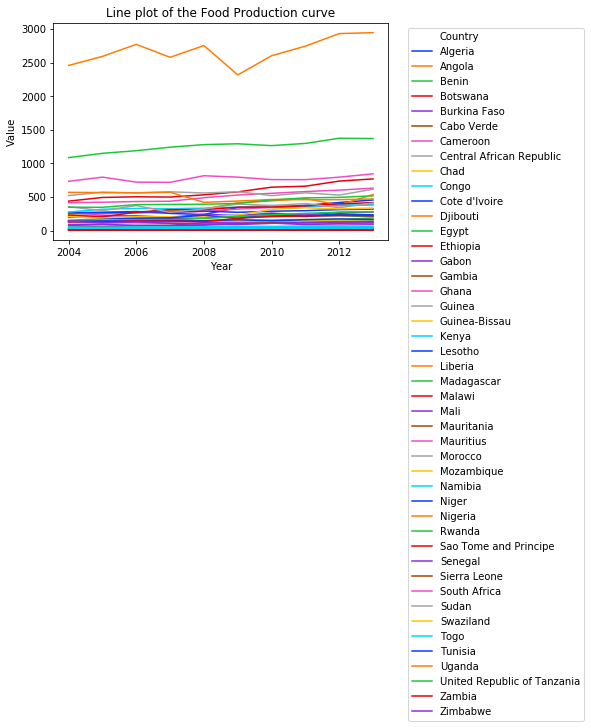

In [22]:
line_plot = sns.lineplot(x = df['Year'], y= df['Value'], hue = df['Country'], palette = "bright", ci = None, data = df)
#line_plot.set_yscale('log')
line_plot.legend(loc = 'upper right', bbox_to_anchor =(1.6,1))
line_plot.set_title('Line plot of the Food Production curve')
plt.savefig('Food Productions curve.png')

In [23]:
new_dfSumry = new_df.groupby(['Country', 'Year'])["Value"].sum()#.sort_values(ascending = False)
print(new_dfSumry)

Country   Year
Algeria   2004    15536
          2005    15667
          2006    16417
          2007    14763
          2008    13841
                  ...  
Zimbabwe  2009     5754
          2010     6777
          2011     7551
          2012     8173
          2013     7914
Name: Value, Length: 450, dtype: int64


In [24]:
new_df['Value'].describe()

count    23110.000000
mean       327.785201
std       1607.940343
min          0.000000
25%          3.000000
50%         18.000000
75%        108.000000
max      54000.000000
Name: Value, dtype: float64

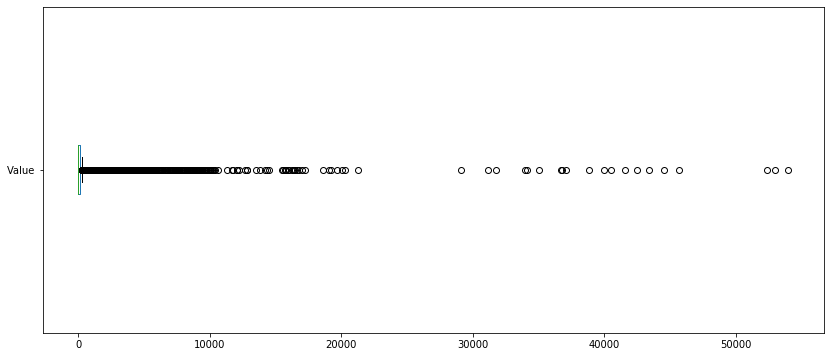

In [25]:
new_df['Value'].plot(kind = "box", vert=False, figsize =(14,6))

In [26]:
fig = px.scatter(df, x= df.Country, y= df.Value, size='Value', color='Value', title = 'Food Production across African Countries between 2004 and 2013')
fig.show()


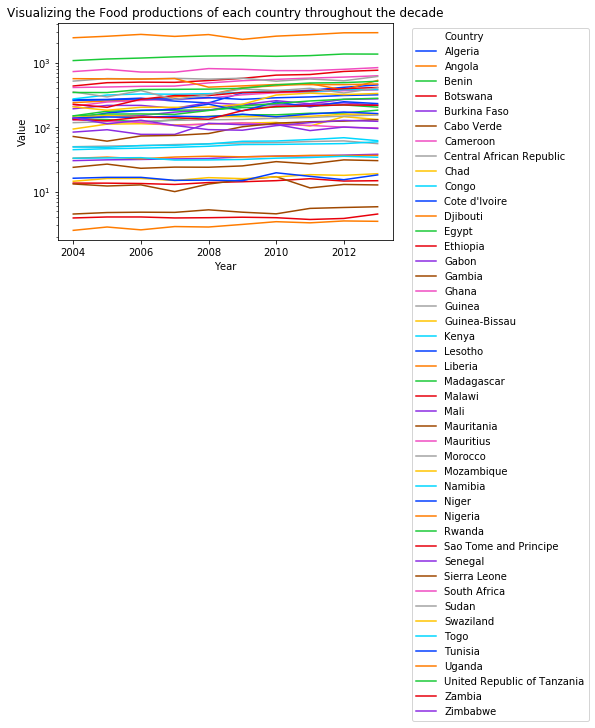

In [27]:
line_plot = sns.lineplot(x = df['Year'], y= df['Value'], hue = df['Country'], palette = "bright", ci = None, data = df,)
line_plot.set_title('Visualizing the Food productions of each country throughout the decade')
line_plot.set_yscale('log')
line_plot.legend(loc = 'upper right', bbox_to_anchor =(1.6,1))

In [28]:
import plotly.express as px
#import plotly.graph_objects as go

In [29]:
fig = px.scatter(df, x= df.Year, y= df.Value, size='Value', color='Value', title ='Year-Value plot, showing the year with the highest food production')
fig.show()

In [48]:
adfgrouped = pd.DataFrame(df.groupby(['Country', 'Year'],as_index=False).sum())
adfgrouped_code = pd.merge(adfgrouped,country_list, on= 'Country' ) 
px.choropleth(adfgrouped_code,locations="Code",color='Value',hover_name='Country', range_color=(0,60000), animation_frame='Year',scope='africa', color_continuous_scale='Plasma', title= 'Countries and their food production values across the decade')


In [31]:
df_Item = pd.DataFrame(df.groupby(['Country', 'Year', 'Item'],as_index=False).sum())
df_Item
fig = px.bar(df, x='Year', y='Value', color='Country', labels={'y':'log Value'},
             hover_data=['Item'],
             title='Africa Food Production showing Countries, Year, Items and values')
fig.show()

In [32]:
df_Item

Country  Year                   Item  Value
0       Algeria  2004    Apples and products    165
1       Algeria  2004                Bananas      0
2       Algeria  2004    Barley and products   1212
3       Algeria  2004                  Beans      2
4       Algeria  2004                   Beer    110
...         ...   ...                    ...    ...
23105  Zimbabwe  2013   Tea (including mate)     19
23106  Zimbabwe  2013  Tomatoes and products     24
23107  Zimbabwe  2013      Vegetables, Other    203
23108  Zimbabwe  2013     Wheat and products     25
23109  Zimbabwe  2013                   Wine      2

[23110 rows x 4 columns]

In [33]:
url = ("C:\\Users\\USER\\jupyter_docs\\Africa Food Supply (2004 - 2013).csv")
supply_df = pd.read_csv(url)
print (supply_df)

      Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]


In [34]:
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [35]:
supply_df.describe()

Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000

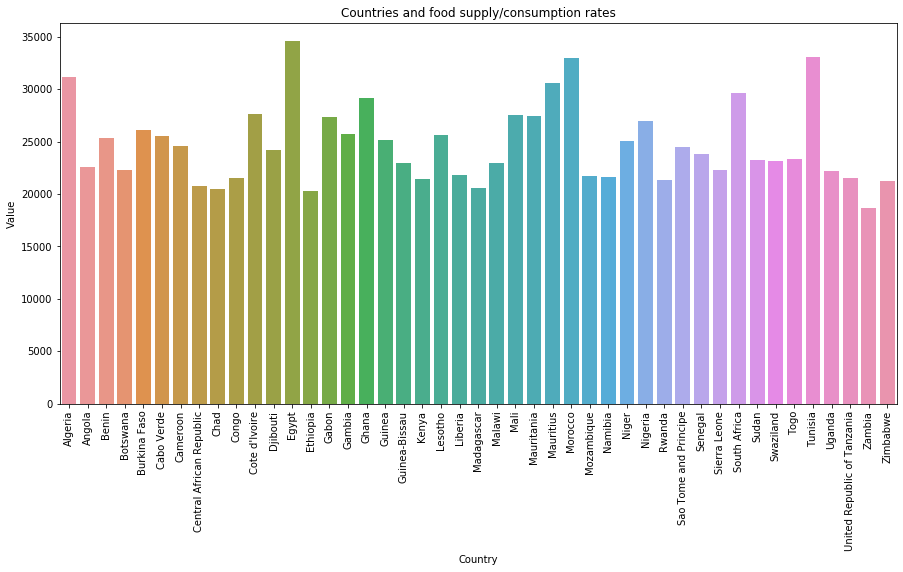

In [36]:
supplydf_country=pd.DataFrame(supply_df.groupby(by =['Country'], as_index=False)['Value'].sum())
#print(supplydf_country)
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel('Value')
plt.title('Countries and food supply/consumption rates')
plt.savefig('food_supply.png')
g = sns.barplot(data=supplydf_country, x=supplydf_country['Country'].values, y= "Value")
#g.set_yscale("log")
#g.set_ylim(1, 4000)

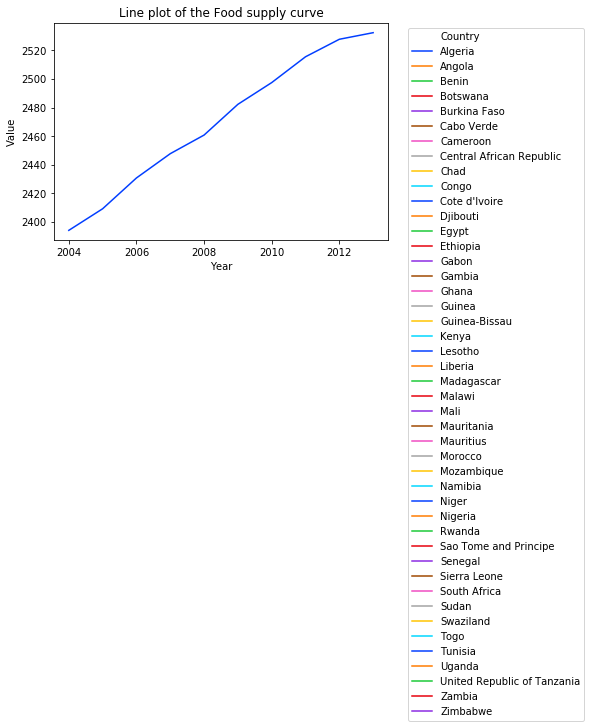

In [37]:
line_plot = sns.lineplot(x = supply_df['Year'], y= supply_df['Value'], hue = df['Country'], palette = "bright", ci = None, data = supply_df)
#line_plot.set_yscale('log')
line_plot.legend(loc = 'upper right', bbox_to_anchor =(1.6,1))
line_plot.set_title('Line plot of the Food supply curve')
plt.savefig('Food supply curve.png')

In [38]:
fig = px.bar(supply_df, x='Year', y='Value', color='Country', labels={'y':'log Value'},
             hover_data=['Country'],
             title='Bar chart of each country, year and the corresponding food supplies')
fig.show()

In [39]:
url =('C:\\Users\\USER\\jupyter_docs\\Country Codes.csv')
countrycode = pd.read_csv(url)
countrycode

Country Code
0       Afghanistan  AFG
1           Albania  ALB
2           Algeria  DZA
3    American Samoa  ASM
4           Andorra  AND
..              ...  ...
217  Virgin Islands  VGB
218       West Bank  WBG
219           Yemen  YEM
220          Zambia  ZMB
221        Zimbabwe  ZWE

[222 rows x 2 columns]

In [40]:
supply_df=pd.merge(supply_df,countrycode, on= 'Country')
supply_df

Country  Year  Value Code
0     Algeria  2004   2987  DZA
1     Algeria  2005   2958  DZA
2     Algeria  2006   3047  DZA
3     Algeria  2007   3041  DZA
4     Algeria  2008   3048  DZA
..        ...   ...    ...  ...
415  Zimbabwe  2009   2147  ZWE
416  Zimbabwe  2010   2168  ZWE
417  Zimbabwe  2011   2200  ZWE
418  Zimbabwe  2012   2197  ZWE
419  Zimbabwe  2013   2110  ZWE

[420 rows x 4 columns]

In [41]:
supply_df.describe()

Year        Value
count   420.000000   420.000000
mean   2008.500000  2482.438095
std       2.875707   385.399626
min    2004.000000  1781.000000
25%    2006.000000  2191.750000
50%    2008.500000  2405.500000
75%    2011.000000  2706.250000
max    2013.000000  3561.000000

In [42]:
px.choropleth(supply_df,locations="Code",color='Value',hover_name='Country', range_color=(0,3600), animation_frame='Year',scope='africa', title='Interactive map showing selected Countries, years and food supply values', color_continuous_scale='Plasma')

In [43]:
fig = px.box(supply_df, x= supply_df.Country, y= supply_df.Value, color='Country', title = 'Interactive boxplot of Africa Food supply')
fig.show()

In [44]:
fig = px.scatter(supply_df, x= supply_df.Country, y= supply_df.Value, size='Value', color='Value', title ="Interactive plot of the Country-Value Food supply")
fig.show()

In [45]:
fig = px.box(supply_df, x= supply_df.Year, y= supply_df.Value,notched=True, color='Year', hover_data = ['Country'], title= 'Presence of outliers in the Food supply' )
fig.show()

In [46]:
supply_df2012 = supply_df.loc[(supply_df['Year']==2012) ]
#print(supply_df2012)
country_list =pd.DataFrame(supply_df2012[["Country",'Code']]) 
country_list

Country Code
8                     Algeria  DZA
18                     Angola  AGO
28                      Benin  BEN
38                   Botswana  BWA
48               Burkina Faso  BFA
58                 Cabo Verde  CPV
68                   Cameroon  CMR
78   Central African Republic  CAF
88                       Chad  TCD
98              Cote d'Ivoire  CIV
108                  Djibouti  DJI
118                     Egypt  EGY
128                  Ethiopia  ETH
138                     Gabon  GAB
148                     Ghana  GHA
158                    Guinea  GIN
168             Guinea-Bissau  GNB
178                     Kenya  KEN
188                   Lesotho  LSO
198                   Liberia  LBR
208                Madagascar  MDG
218                    Malawi  MWI
228                      Mali  MLI
238                Mauritania  MRT
248                 Mauritius  MUS
258                   Morocco  MAR
268                Mozambique  MOZ
278                   Namibia  NAM
288                     Niger  NER
298                   Nigeria  NGA
308                    Rwanda  RWA
318     Sao Tome and Principe  STP
328                   Senegal  SEN
338              Sierra Leone  SLE
348              South Africa  ZAF
350                     Sudan  SDN
368                 Swaziland  SWZ
378                      Togo  TGO
388                   Tunisia  TUN
398                    Uganda  UGA
408                    Zambia  ZMB
418                  Zimbabwe  ZWE

In [47]:
afriCountries = country_list.rename(columns={'Country':'Country Name'})
afriCountries

Country Name Code
8                     Algeria  DZA
18                     Angola  AGO
28                      Benin  BEN
38                   Botswana  BWA
48               Burkina Faso  BFA
58                 Cabo Verde  CPV
68                   Cameroon  CMR
78   Central African Republic  CAF
88                       Chad  TCD
98              Cote d'Ivoire  CIV
108                  Djibouti  DJI
118                     Egypt  EGY
128                  Ethiopia  ETH
138                     Gabon  GAB
148                     Ghana  GHA
158                    Guinea  GIN
168             Guinea-Bissau  GNB
178                     Kenya  KEN
188                   Lesotho  LSO
198                   Liberia  LBR
208                Madagascar  MDG
218                    Malawi  MWI
228                      Mali  MLI
238                Mauritania  MRT
248                 Mauritius  MUS
258                   Morocco  MAR
268                Mozambique  MOZ
278                   Namibia  NAM
288                     Niger  NER
298                   Nigeria  NGA
308                    Rwanda  RWA
318     Sao Tome and Principe  STP
328                   Senegal  SEN
338              Sierra Leone  SLE
348              South Africa  ZAF
350                     Sudan  SDN
368                 Swaziland  SWZ
378                      Togo  TGO
388                   Tunisia  TUN
398                    Uganda  UGA
408                    Zambia  ZMB
418                  Zimbabwe  ZWE

In [49]:
df_rice = df.loc[df['Item']=='Rice (Milled Equivalent)']
print(df_rice)

        Country                      Item  Year  Value
10      Algeria  Rice (Milled Equivalent)  2004      0
11      Algeria  Rice (Milled Equivalent)  2005      0
12      Algeria  Rice (Milled Equivalent)  2006      0
13      Algeria  Rice (Milled Equivalent)  2007      0
14      Algeria  Rice (Milled Equivalent)  2008      0
...         ...                       ...   ...    ...
22485  Zimbabwe  Rice (Milled Equivalent)  2009      0
22486  Zimbabwe  Rice (Milled Equivalent)  2010      0
22487  Zimbabwe  Rice (Milled Equivalent)  2011      0
22488  Zimbabwe  Rice (Milled Equivalent)  2012      0
22489  Zimbabwe  Rice (Milled Equivalent)  2013      0

[380 rows x 4 columns]


In [50]:
meanRiceprod = pd.DataFrame(df_rice.groupby(['Country'])["Value"].mean().sort_values())
meanRiceprod

Value
Country                            
Algeria                         0.0
Swaziland                       0.0
Mauritius                       0.1
Zimbabwe                        0.1
Congo                           1.0
Gabon                           1.0
South Africa                    2.2
Angola                         10.3
Sudan                          17.0
Zambia                         21.2
Central African Republic       26.1
Niger                          26.7
Morocco                        27.4
Gambia                         32.5
Ethiopia                       46.9
Rwanda                         48.2
Kenya                          50.4
Togo                           65.3
Malawi                         67.4
Mauritania                     75.1
Cameroon                       76.7
Benin                          85.0
Guinea-Bissau                 103.0
Mozambique                    111.0
Chad                          116.7
Uganda                        123.4
Burkina Faso                  126.5
Liberia                       160.2
Ghana                         244.3
Senegal                       246.2
Sierra Leone                  603.8
Cote d'Ivoire                 643.9
Mali                         1037.1
Guinea                       1040.0
United Republic of Tanzania  1095.6
Madagascar                   2611.8
Nigeria                      2696.4
Egypt                        4037.0

In [51]:
fig = px.scatter(meanRiceprod, x= meanRiceprod.index, y= meanRiceprod.Value, size='Value', color='Value', title =" Mean Rice production in African Countries")
fig.show()

In [52]:
world_pop = pd.read_csv('C:\\Users\\USER\\jupyter_docs\\World_Population.csv')
world_pop

Country Name  Code     Indicator Name Indicator Code        1960  \
0           Aruba   ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan   AFG  Population, total    SP.POP.TOTL   8996973.0   
2          Angola   AGO  Population, total    SP.POP.TOTL   5454933.0   
3         Albania   ALB  Population, total    SP.POP.TOTL   1608800.0   
4         Andorra   AND  Population, total    SP.POP.TOTL     13411.0   
..            ...   ...                ...            ...         ...   
259        Kosovo   XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.   YEM  Population, total    SP.POP.TOTL   5315355.0   
261  South Africa   ZAF  Population, total    SP.POP.TOTL  17099840.0   
262        Zambia   ZMB  Population, total    SP.POP.TOTL   3070776.0   
263      Zimbabwe   ZWE  Population, total    SP.POP.TOTL   3776681.0   

           1961        1962        1963        1964        1965  ...  \
0       55438.0     56225.0     56695.0     57032.0     57360.0  ...   
1     9169410.0   9351441.0   9543205.0   9744781.0   9956320.0  ...   
2     5531472.0   5608539.0   5679458.0   5735044.0   5770570.0  ...   
3     1659800.0   1711319.0   1762621.0   1814135.0   1864791.0  ...   
4       14375.0     15370.0     16412.0     17469.0     18549.0  ...   
..          ...         ...         ...         ...         ...  ...   
259    966000.0    994000.0   1022000.0   1050000.0   1078000.0  ...   
260   5393036.0   5473671.0   5556766.0   5641597.0   5727751.0  ...   
261  17524533.0  17965725.0  18423161.0  18896307.0  19384841.0  ...   
262   3164329.0   3260650.0   3360104.0   3463213.0   3570464.0  ...   
263   3905034.0   4039201.0   4178726.0   4322861.0   4471177.0  ...   

           2010        2011        2012        2013        2014        2015  \
0      101669.0    102046.0    102560.0    103159.0    103774.0    104341.0   
1    29185507.0  30117413.0  31161376.0  32269589.0  33370794.0  34413603.0   
2    23356246.0  24220661.0  25107931.0  26015780.0  26941779.0  27884381.0   
3     2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   2880703.0   
4       84449.0     83747.0     82427.0     80774.0     79213.0     78011.0   
..          ...         ...         ...         ...         ...         ...   
259   1775680.0   1791000.0   1807106.0   1818117.0   1812771.0   1788196.0   
260  23154855.0  23807588.0  24473178.0  25147109.0  25823485.0  26497889.0   
261  51216964.0  52004172.0  52834005.0  53689236.0  54545991.0  55386367.0   
262  13605984.0  14023193.0  14465121.0  14926504.0  15399753.0  15879361.0   
263  12697723.0  12894316.0  13115131.0  13350356.0  13586681.0  13814629.0   

           2016        2017        2018        2019  
0      104872.0    105366.0    105845.0    106314.0  
1    35383128.0  36296400.0  37172386.0  38041754.0  
2    28842484.0  29816748.0  30809762.0  31825295.0  
3     2876101.0   2873457.0   2866376.0   2854191.0  
4       77297.0     77001.0     77006.0     77142.0  
..          ...         ...         ...         ...  
259   1777557.0   1791003.0   1797085.0   1794248.0  
260  27168210.0  27834821.0  28498687.0  29161922.0  
261  56203654.0  57000451.0  57779622.0  58558270.0  
262  16363507.0  16853688.0  17351822.0  17861030.0  
263  14030390.0  14236745.0  14439018.0  14645468.0  

[264 rows x 64 columns]

In [53]:
africa =pd.merge(afriCountries,world_pop, on='Country Name')
africa 

Country Name Code  Code     Indicator Name Indicator Code  \
0                    Algeria  DZA   DZA  Population, total    SP.POP.TOTL   
1                     Angola  AGO   AGO  Population, total    SP.POP.TOTL   
2                      Benin  BEN   BEN  Population, total    SP.POP.TOTL   
3                   Botswana  BWA   BWA  Population, total    SP.POP.TOTL   
4               Burkina Faso  BFA   BFA  Population, total    SP.POP.TOTL   
5                 Cabo Verde  CPV   CPV  Population, total    SP.POP.TOTL   
6                   Cameroon  CMR   CMR  Population, total    SP.POP.TOTL   
7   Central African Republic  CAF   CAF  Population, total    SP.POP.TOTL   
8                       Chad  TCD   TCD  Population, total    SP.POP.TOTL   
9              Cote d'Ivoire  CIV   CIV  Population, total    SP.POP.TOTL   
10                  Djibouti  DJI   DJI  Population, total    SP.POP.TOTL   
11                  Ethiopia  ETH   ETH  Population, total    SP.POP.TOTL   
12                     Gabon  GAB   GAB  Population, total    SP.POP.TOTL   
13                     Ghana  GHA   GHA  Population, total    SP.POP.TOTL   
14                    Guinea  GIN   GIN  Population, total    SP.POP.TOTL   
15             Guinea-Bissau  GNB   GNB  Population, total    SP.POP.TOTL   
16                     Kenya  KEN   KEN  Population, total    SP.POP.TOTL   
17                   Lesotho  LSO   LSO  Population, total    SP.POP.TOTL   
18                   Liberia  LBR   LBR  Population, total    SP.POP.TOTL   
19                Madagascar  MDG   MDG  Population, total    SP.POP.TOTL   
20                    Malawi  MWI   MWI  Population, total    SP.POP.TOTL   
21                      Mali  MLI   MLI  Population, total    SP.POP.TOTL   
22                Mauritania  MRT   MRT  Population, total    SP.POP.TOTL   
23                 Mauritius  MUS   MUS  Population, total    SP.POP.TOTL   
24                   Morocco  MAR   MAR  Population, total    SP.POP.TOTL   
25                Mozambique  MOZ   MOZ  Population, total    SP.POP.TOTL   
26                   Namibia  NAM   NAM  Population, total    SP.POP.TOTL   
27                     Niger  NER   NER  Population, total    SP.POP.TOTL   
28                   Nigeria  NGA   NGA  Population, total    SP.POP.TOTL   
29                    Rwanda  RWA   RWA  Population, total    SP.POP.TOTL   
30     Sao Tome and Principe  STP   STP  Population, total    SP.POP.TOTL   
31                   Senegal  SEN   SEN  Population, total    SP.POP.TOTL   
32              Sierra Leone  SLE   SLE  Population, total    SP.POP.TOTL   
33              South Africa  ZAF   ZAF  Population, total    SP.POP.TOTL   
34                     Sudan  SDN   SDN  Population, total    SP.POP.TOTL   
35                      Togo  TGO   TGO  Population, total    SP.POP.TOTL   
36                   Tunisia  TUN   TUN  Population, total    SP.POP.TOTL   
37                    Uganda  UGA   UGA  Population, total    SP.POP.TOTL   
38                    Zambia  ZMB   ZMB  Population, total    SP.POP.TOTL   
39                  Zimbabwe  ZWE   ZWE  Population, total    SP.POP.TOTL   

          1960        1961        1962        1963        1964  ...  \
0   11057863.0  11336339.0  11619828.0  11912803.0  12221675.0  ...   
1    5454933.0   5531472.0   5608539.0   5679458.0   5735044.0  ...   
2    2431622.0   2465867.0   2502896.0   2542859.0   2585965.0  ...   
3     502745.0    512685.0    523778.0    535685.0    547873.0  ...   
4    4829288.0   4894580.0   4960326.0   5027821.0   5098890.0  ...   
5     201765.0    205327.0    210142.0    216096.0    222948.0  ...   
6    5176918.0   5285017.0   5398729.0   5518104.0   5643036.0  ...   
7    1501668.0   1526066.0   1551910.0   1579370.0   1608616.0  ...   
8    3001609.0   3060368.0   3121236.0   3183572.0   3246523.0  ...   
9    3503553.0   3631553.0   3770766.0   3918628.0   4071411.0  ...   
10     83636.0     88498.0     94204.0    100628.0    107583.0  ...   
11  22

In [54]:
africa = africa [['Country Name', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']]
africa  = pd.melt(africa, id_vars = ['Country Name'],var_name='Year')
africa = africa.groupby('Year').mean()
africa.rename(columns={'value':'Population'}, inplace=True)
africa 

Population
Year              
2004  1.718777e+07
2005  1.760921e+07
2006  1.804540e+07
2007  1.849633e+07
2008  1.896249e+07
2009  1.944416e+07
2010  1.994145e+07
2011  2.045453e+07
2012  2.098329e+07
2013  2.152676e+07

In [55]:
meanRiceprod

Value
Country                            
Algeria                         0.0
Swaziland                       0.0
Mauritius                       0.1
Zimbabwe                        0.1
Congo                           1.0
Gabon                           1.0
South Africa                    2.2
Angola                         10.3
Sudan                          17.0
Zambia                         21.2
Central African Republic       26.1
Niger                          26.7
Morocco                        27.4
Gambia                         32.5
Ethiopia                       46.9
Rwanda                         48.2
Kenya                          50.4
Togo                           65.3
Malawi                         67.4
Mauritania                     75.1
Cameroon                       76.7
Benin                          85.0
Guinea-Bissau                 103.0
Mozambique                    111.0
Chad                          116.7
Uganda                        123.4
Burkina Faso                  126.5
Liberia                       160.2
Ghana                         244.3
Senegal                       246.2
Sierra Leone                  603.8
Cote d'Ivoire                 643.9
Mali                         1037.1
Guinea                       1040.0
United Republic of Tanzania  1095.6
Madagascar                   2611.8
Nigeria                      2696.4
Egypt                        4037.0

In [56]:
len(meanRiceprod)== len(africa)

False

In [57]:
meanRiceprod.index = meanRiceprod.index.astype(int)
africa.index =africa.index.astype(int)
test_data = meanRiceprod.join(africa, how='outer')
test_data

TypeError: Cannot cast Index to dtype <class 'int'>

In [58]:
fig = px.scatter(test_data, x= test_data.Value, y= test_data.Population, size='Value', color='Value', title ="Rice production vs population in African Countries(2004-2013)")
fig.show()

NameError: name 'test_data' is not defined

In [59]:
import numpy as np
from scipy import stats
rice = np.array([326.789474,348.763158,361.500000,379.026316,405.842105,420.289474,454.157895,457.315789,482.394737,489.578947])
africapop = np.array([1.718777e+07,1.760921e+07,1.804540e+07,1.849633e+07,1.896249e+07,1.944416e+07,1.994145e+07,2.045453e+07,2.098329e+07,2.152676e+07])
stats.pearsonr(rice,africapop)

(0.9925638291943724, 1.3258512643917009e-08)

In [60]:
fig = px.scatter( x= rice, y= africapop, title= 'Consumption of Rice in Africa')
fig.show()

In [61]:
#37 Nigeria and Algeria have 37 common food produce. 
Nigeria_df =df.loc[ df["Country"]=='Nigeria']
Algeria_df =df.loc[ df["Country"]=='Algeria']
print(Nigeria_df['Item'][Nigeria_df['Item'].isin(Algeria_df['Item'])].unique())
Nigeria_df['Item'][Nigeria_df['Item'].isin(Algeria_df['Item'])].nunique()

['Wheat and products' 'Rice (Milled Equivalent)' 'Maize and products'
 'Sorghum and products' 'Cereals, Other' 'Potatoes and products'
 'Sugar (Raw Equivalent)' 'Pulses, Other and products' 'Nuts and products'
 'Groundnuts (Shelled Eq)' 'Cottonseed' 'Groundnut Oil'
 'Oilcrops Oil, Other' 'Tomatoes and products' 'Onions'
 'Vegetables, Other' 'Citrus, Other' 'Fruits, Other' 'Pimento' 'Beer'
 'Bovine Meat' 'Mutton & Goat Meat' 'Pigmeat' 'Poultry Meat' 'Meat, Other'
 'Offals, Edible' 'Butter, Ghee' 'Fats, Animals, Raw' 'Eggs'
 'Milk - Excluding Butter' 'Freshwater Fish' 'Demersal Fish'
 'Pelagic Fish' 'Marine Fish, Other' 'Crustaceans' 'Cephalopods'
 'Molluscs, Other']


37

In [62]:
meanProd = pd.DataFrame(df.groupby(['Year'])["Value"].mean().sort_values())
meanProd

Value
Year            
2004  286.767301
2005  298.986592
2007  305.215830
2006  310.814014
2008  318.686851
2009  323.040657
2010  340.166955
2011  351.303633
2012  364.831816
2013  378.227568

In [63]:
meanProd = pd.DataFrame(df.groupby(['Year'])["Value"].mean().sort_values())
meanProd=meanProd.rename(columns={'Value':'Production'})
meanProd

Production
Year            
2004  286.767301
2005  298.986592
2007  305.215830
2006  310.814014
2008  318.686851
2009  323.040657
2010  340.166955
2011  351.303633
2012  364.831816
2013  378.227568

In [64]:
meanSupply = pd.DataFrame(supply_df.groupby(['Year'])["Value"].mean().sort_values())
meanSupply=meanSupply.rename(columns = {'Value':'Supply'})
meanSupply

Supply
Year             
2004  2402.714286
2005  2423.785714
2006  2445.357143
2007  2458.666667
2008  2473.880952
2009  2495.333333
2010  2511.166667
2011  2526.595238
2012  2541.476190
2013  2545.404762

In [65]:
meanProd.index = meanProd.index.astype(int)
meanSupply.index =meanSupply.index.astype(int)
compare_data = meanProd.join(meanSupply, how='outer')
compare_data

Production       Supply
Year                         
2004  286.767301  2402.714286
2005  298.986592  2423.785714
2006  310.814014  2445.357143
2007  305.215830  2458.666667
2008  318.686851  2473.880952
2009  323.040657  2495.333333
2010  340.166955  2511.166667
2011  351.303633  2526.595238
2012  364.831816  2541.476190
2013  378.227568  2545.404762

In [66]:
compare_data.index = compare_data.index.astype(int)
africa.index =africa.index.astype(int)
compare_data = compare_data.join(africa, how='outer')
compare_data 

Production       Supply    Population
Year                                       
2004  286.767301  2402.714286  1.718777e+07
2005  298.986592  2423.785714  1.760921e+07
2006  310.814014  2445.357143  1.804540e+07
2007  305.215830  2458.666667  1.849633e+07
2008  318.686851  2473.880952  1.896249e+07
2009  323.040657  2495.333333  1.944416e+07
2010  340.166955  2511.166667  1.994145e+07
2011  351.303633  2526.595238  2.045453e+07
2012  364.831816  2541.476190  2.098329e+07
2013  378.227568  2545.404762  2.152676e+07

In [67]:
fig = px.scatter(compare_data, x= compare_data.Production, y=compare_data.Supply, size='Population', color=compare_data.index, title ='Mean Food production vs Mean Food Supply')
fig.show()

In [68]:
fig = px.scatter(compare_data, x= compare_data.Production, y=compare_data.Population, size='Population', color=compare_data.index, title ='Mean Food production vs Mean Population')
fig.show()

In [69]:
fig = px.scatter(compare_data, x= compare_data.Supply, y=compare_data.Population, size='Population', color=compare_data.index, title ='Mean Food supply vs Mean Population')
fig.show()


In [70]:
#Quiz question
df2010it = df.loc[(df['Year']==2010) & (df["Item"]=='Oats')]
print(df2010it)

            Country  Item  Year  Value
46          Algeria  Oats  2010     88
6406       Ethiopia  Oats  2010     48
7746          Ghana  Oats  2010      0
9286          Kenya  Oats  2010      3
10026       Lesotho  Oats  2010      0
13186       Morocco  Oats  2010     37
17816  South Africa  Oats  2010     34
20056       Tunisia  Oats  2010      2
22516      Zimbabwe  Oats  2010      1


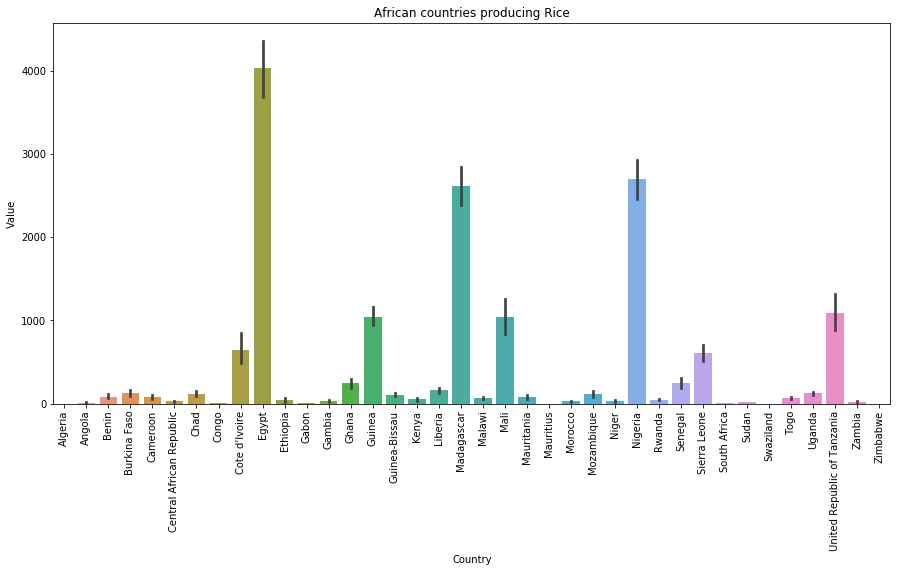

In [71]:
#Quiz question
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel('Value')
plt.savefig('Rice Production.pdf')
plt.title('African countries producing Rice')
g = sns.barplot(data=df_rice, x=df_rice['Country'], y= "Value")